# Packages to install

pip install ipywidgets 

jupyter nbextension enable --py widgetsnbextension

jupyter labextension install @jupyter-widgets/jupyterlab-manager

# Loading Basic Libraries

In [1]:
import numpy as np
import pandas as pd
import time

In [2]:
%%capture
from tqdm import tqdm_notebook as tqdm_nb
from tqdm import tnrange
tqdm_nb().pandas()

# Dataset Preparation / Loading

In [3]:
csv_path = 'C:\\Files\\Final\\Projects\\Session\\iris.csv'
data = pd.read_csv(csv_path)

In [4]:
category = pd.Categorical(data.species)
category

[Iris-setosa, Iris-setosa, Iris-setosa, Iris-setosa, Iris-setosa, ..., Iris-virginica, Iris-virginica, Iris-virginica, Iris-virginica, Iris-virginica]
Length: 150
Categories (3, object): [Iris-setosa, Iris-versicolor, Iris-virginica]

In [5]:
type(category)

pandas.core.arrays.categorical.Categorical

In [6]:
data['class'] = category.codes

In [7]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,class
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [8]:
updated = data.drop(columns=['species'])
updated.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [9]:
updated.shape

(150, 5)

# Split and Preprocess Data

In [10]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(updated,  random_state = 42)

In [11]:
train.shape

(112, 5)

In [12]:
test.shape

(38, 5)

# Data conversion to Torch

In [13]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

import numpy as np
torch.manual_seed(42)

In [14]:
feature_set_x = ['sepal_length' ,'sepal_width' ,'petal_length' ,'petal_width']
feature_set_y = 'class'

In [15]:
train_x =Variable(torch.FloatTensor(train[feature_set_x].values), requires_grad = False)
train_y =Variable(torch.LongTensor(train[feature_set_y].values), requires_grad = False)

test_x =Variable(torch.FloatTensor(test[feature_set_x].values), requires_grad = False)
test_y =Variable(torch.LongTensor(test[feature_set_y].values), requires_grad = False)

# Utilities for Metric Evaluation and Plotting

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
%matplotlib inline

from sklearn.metrics import accuracy_score as accuracy

In [17]:
def plot_fn(loss):
    loss = np.array(loss, dtype = np.float)
    plt.plot(loss)

In [18]:
def format_results(epoch  , loss , acc):
    print ( "Epoch: {0:5d},  Loss : {1:0.4f} ,  Accuracy : {2:0.4f}". 
           format(epoch, loss , acc))

# Hyper Parameters

Change values in the followng sections to see how the accuracy can be increased

In [19]:
num_epoch = 10000
per_epoch = int(num_epoch/10)
lr = 0.001

In [20]:
num_features = 4  # Dimension of input features
num_classes  = 3  # Dimension of output

In [21]:
# Try various activation functions
actv_func = nn.ReLU()

In [22]:
# No of hidden layers and their size
# h_layers = [4, 4 ,3]   # Trial 1
h_layers = [4 ,3 ]     # Trial 2
# h_layers = [ ]         # Trial 3

# Building Model

In [23]:
def Create_hidden(h_layers):
    layers = []
    input_num = num_features
    
    for h in h_layers:
        output_num = h
        #print(input_num , output_num)
        layers.append ( nn.Linear(input_num , output_num) ) 
        layers.append ( actv_func )
        input_num = h
        
    layers.append ( nn.Linear(input_num , num_classes) ) 
    net = nn.Sequential(*layers)
    return net

In [24]:
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.net = Create_hidden(h_layers)
        
    def forward(self,x):
        y = self.net(x)
        return y

In [25]:
model = Classifier()

In [26]:
model

Classifier(
  (net): Sequential(
    (0): Linear(in_features=4, out_features=4, bias=True)
    (1): ReLU()
    (2): Linear(in_features=4, out_features=3, bias=True)
    (3): ReLU()
    (4): Linear(in_features=3, out_features=3, bias=True)
  )
)

In [27]:
loss_fn = nn.CrossEntropyLoss()
opt_fn  = torch.optim.SGD(model.parameters(), lr=lr)

# Training

In [28]:
loss_array = []

for epoch in tnrange(num_epoch):
    
    pred_y = model(train_x)   
    loss = loss_fn(pred_y, train_y)    
    
    opt_fn.zero_grad()

    loss.backward()
    opt_fn.step()    
    
    losses = np.array(loss_array, dtype = np.float)
    loss_array.append(loss.item())
    
    res_y = np.argmax(pred_y.detach().numpy() , axis = 1)
    
    if (epoch) % per_epoch == 0:
        format_results( epoch+1 , loss.item() , accuracy(train_y, res_y) )

Epoch:     1,  Loss : 1.1325 ,  Accuracy : 0.6518
Epoch:  1001,  Loss : 1.0622 ,  Accuracy : 0.6518
Epoch:  2001,  Loss : 0.9671 ,  Accuracy : 0.6518
Epoch:  3001,  Loss : 0.8252 ,  Accuracy : 0.6518
Epoch:  4001,  Loss : 0.6814 ,  Accuracy : 0.6518
Epoch:  5001,  Loss : 0.5638 ,  Accuracy : 0.6518
Epoch:  6001,  Loss : 0.4384 ,  Accuracy : 0.8750
Epoch:  7001,  Loss : 0.3168 ,  Accuracy : 0.9732
Epoch:  8001,  Loss : 0.2464 ,  Accuracy : 0.9821
Epoch:  9001,  Loss : 0.1969 ,  Accuracy : 0.9821



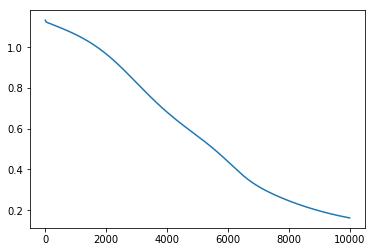

In [29]:
plot_fn(loss_array)

# Testing

In [30]:
pred_y = model(test_x)

In [31]:
pred_y.shape

torch.Size([38, 3])

In [32]:
res = np.argmax(pred_y.detach().numpy() , axis = 1)
res.shape

(38,)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(test_y , res , target_names = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        15
Iris-versicolor       1.00      0.91      0.95        11
 Iris-virginica       0.92      1.00      0.96        12

       accuracy                           0.97        38
      macro avg       0.97      0.97      0.97        38
   weighted avg       0.98      0.97      0.97        38

